In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import numba as nb
from numba import njit
from operator import itemgetter
import sys
import importlib
wheel = dv.ColorWheel()
'''
This script plots the optimal from the simulations and model onto one plot with the 
data
'''

'\nThis script plots the optimal from the simulations and model onto one plot with the \ndata\n'

# Import model function

In [8]:
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Optimal Stopping') 
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Simulations') 

from Subject_Object import *
from plot_functions import *
import Optimal_Stopping_Object_v3
importlib.reload(Optimal_Stopping_Object_v3) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file
from Optimal_Stopping_Object_v3 import *

In [9]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\\Simulation_Figures\\Group\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

# Pickle group data

In [10]:
# Pickle Data
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

# Pickle Numerical Model For Ability I used in that

In [11]:
if 'group_simulation' not in locals():
    load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\Simulation_Objects\\'
    group_simulation = dill.load((open(load_path + 'group_sim_experiment_results.pkl', 'rb')))

# Run Model

In [12]:
group_model = Optimal_Decision_Time_Model(reaction_time = group_simulation.reaction_time_mean, movement_time = group_simulation.movement_time_mean, incorrect_cost = 0, indecision_cost = 0,
                                          reaction_uncertainty = group_simulation.reaction_uncertainty, movement_uncertainty = group_simulation.movement_uncertainty,
                                          timing_uncertainty = group_simulation.timing_uncertainty,
                                          decision_action_delay_uncertainty = group_simulation.decision_to_action_delay_uncertainty, decision_action_delay_mean = group_simulation.decision_to_action_delay_mean,
                                         )

# Plot On Data

In [13]:
save = False

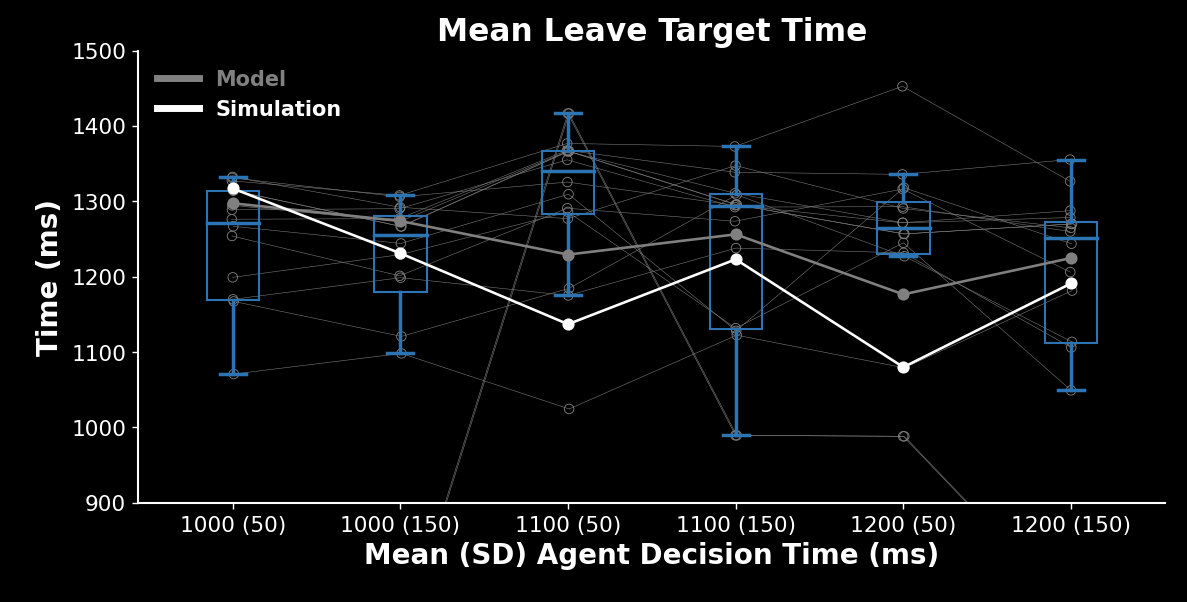

In [18]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 
optimal_metric = group_model.wtd_optimal_leave_target_time
sim_optimal_metric = group_simulation.optimal_mean_results['Mean Leave Target Time']
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')
ax.plot(xlocs,sim_optimal_metric,c='w',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    axmain.set_axis_off()
    # plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
else:
    axmain.set_axis_on()
axmain.set_axis_off()
dv.Custom_Legend(ax,labels=['Model', 'Simulation'],colors=['grey','w'],fontsize=12)
plt.show()

Player Minus Agent Mean Leave Target Time

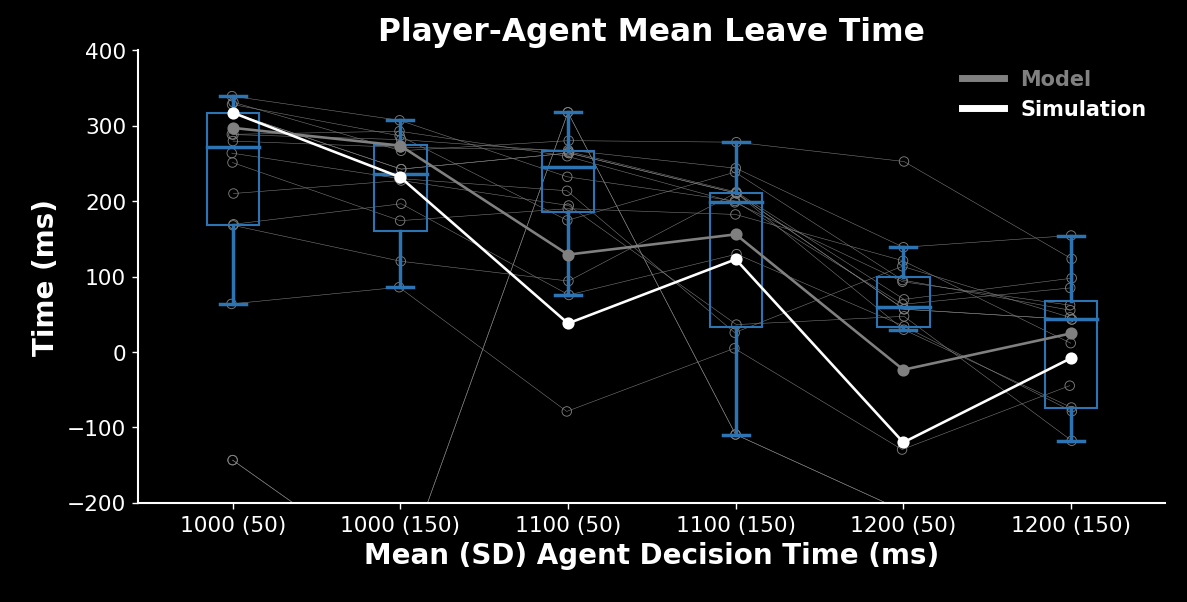

In [36]:
metric = group.combine_all_subjects('player_minus_agent_task_decision_time_mean') 
optimal_metric = group_model.player_minus_agent_leave_time
sim_optimal_metric = np.nanmean(group_simulation.optimal_trial_results['Player Leave Time Minus Agent Decision Time'],axis=1)

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')
ax.plot(xlocs,sim_optimal_metric,c='w',marker='o',zorder=4)


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Player-Agent Mean Leave Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)

dv.Custom_Legend(ax,labels=['Model', 'Simulation'],colors=['grey','w'],fontsize=12)
axmain.set_axis_off()

plt.show()

Indecisions

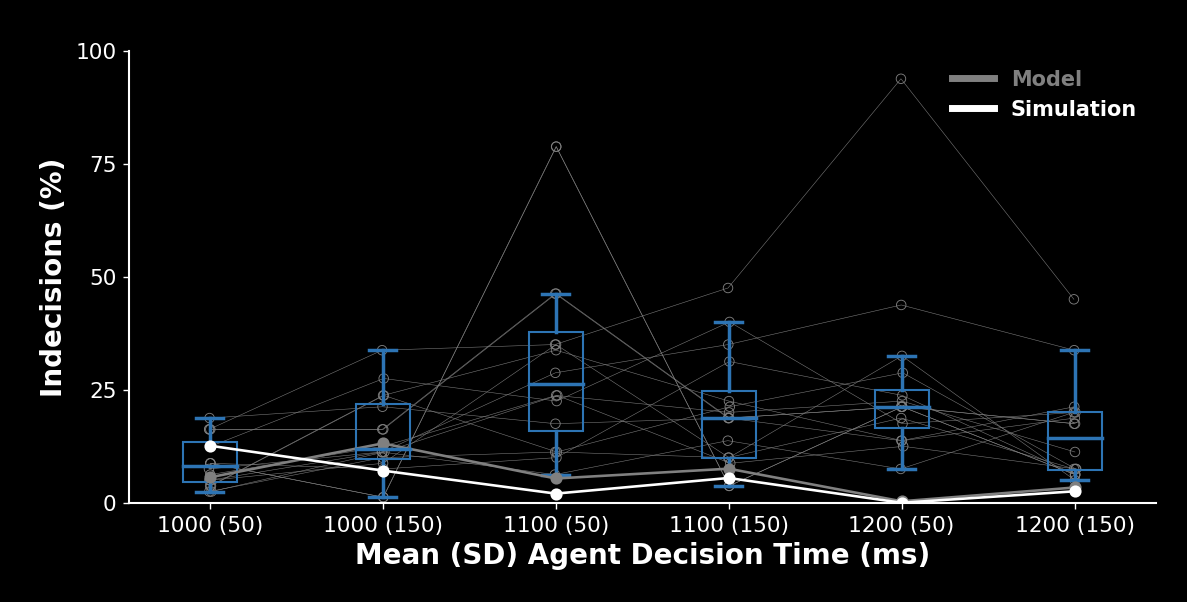

In [34]:
metric = group.combine_all_subjects('player_perc_indecisions') 
optimal_metric = group_model.prob_indecision_optimal*100
sim_optimal_metric = group_simulation.optimal_mean_results['Indecisions']

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')
ax.plot(xlocs,sim_optimal_metric,c='w',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
dv.Custom_Legend(ax,labels=['Model', 'Simulation'],colors=['grey','w'],fontsize=12)
axmain.set_axis_off()

plt.show()

Wins

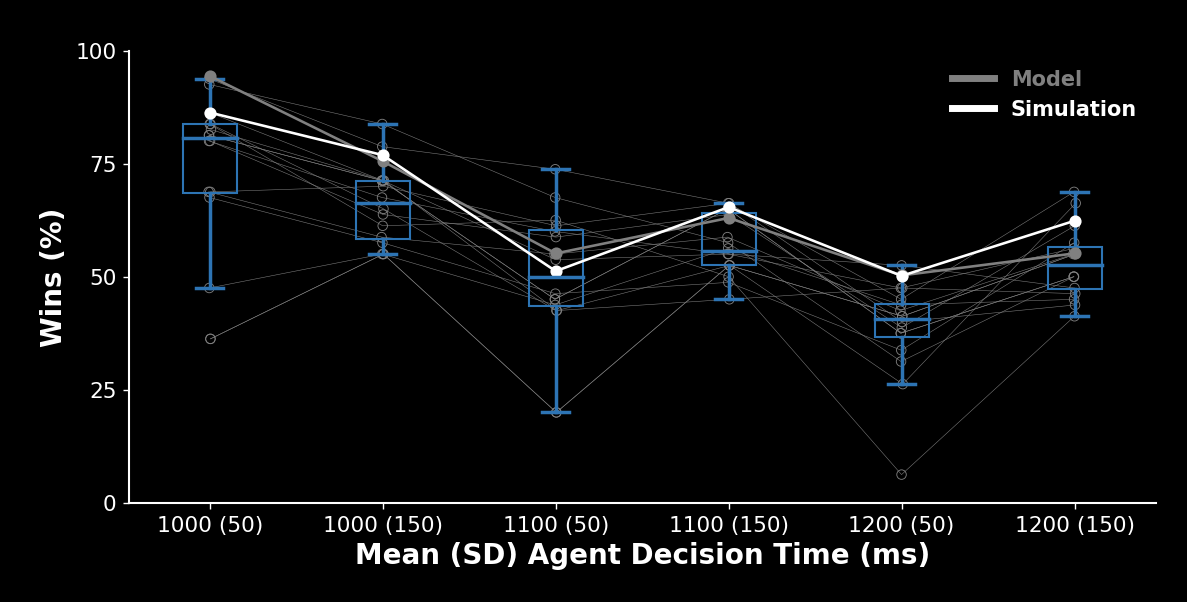

In [33]:
metric = group.combine_all_subjects('player_perc_wins') 
optimal_metric = group_model.prob_win_optimal*100
sim_optimal_metric = group_simulation.optimal_mean_results['Wins']

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')
ax.plot(xlocs,sim_optimal_metric,c='w',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
dv.Custom_Legend(ax,labels=['Model', 'Simulation'],colors=['grey','w'],fontsize=12)
axmain.set_axis_off()

plt.show()

Incorrects

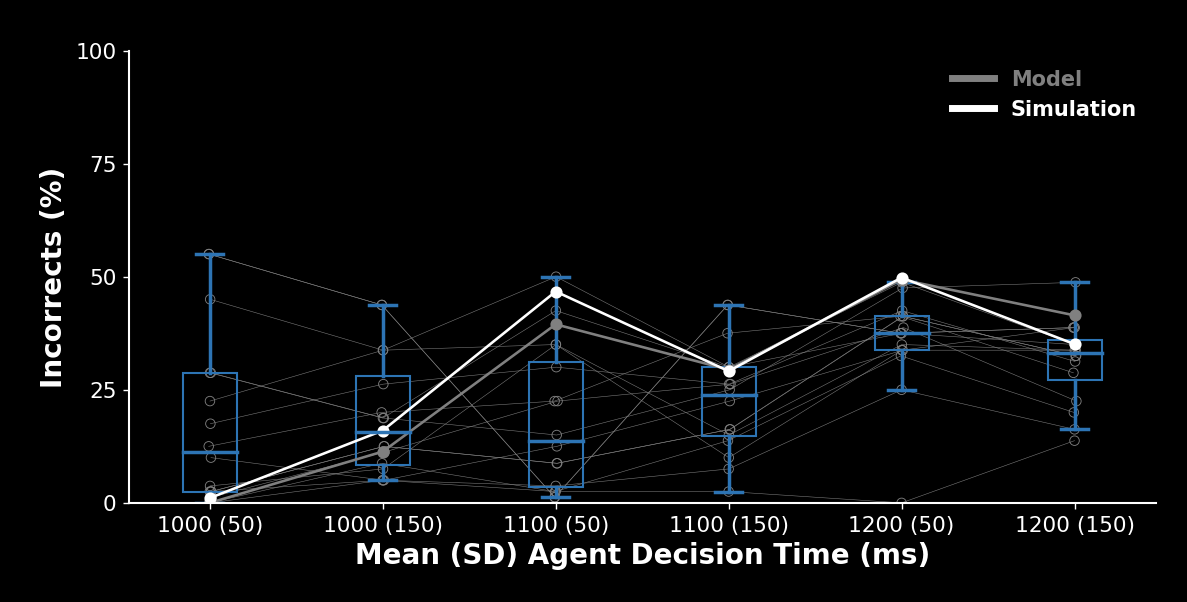

In [32]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric = group_model.prob_incorrect_optimal*100
sim_optimal_metric = group_simulation.optimal_mean_results['Incorrects']

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')
ax.plot(xlocs,sim_optimal_metric,c='w',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
dv.Custom_Legend(ax,labels=['Model', 'Simulation'],colors=['grey','w'],fontsize=12)
axmain.set_axis_off()
plt.show()

Reaction and Gamble Decisions

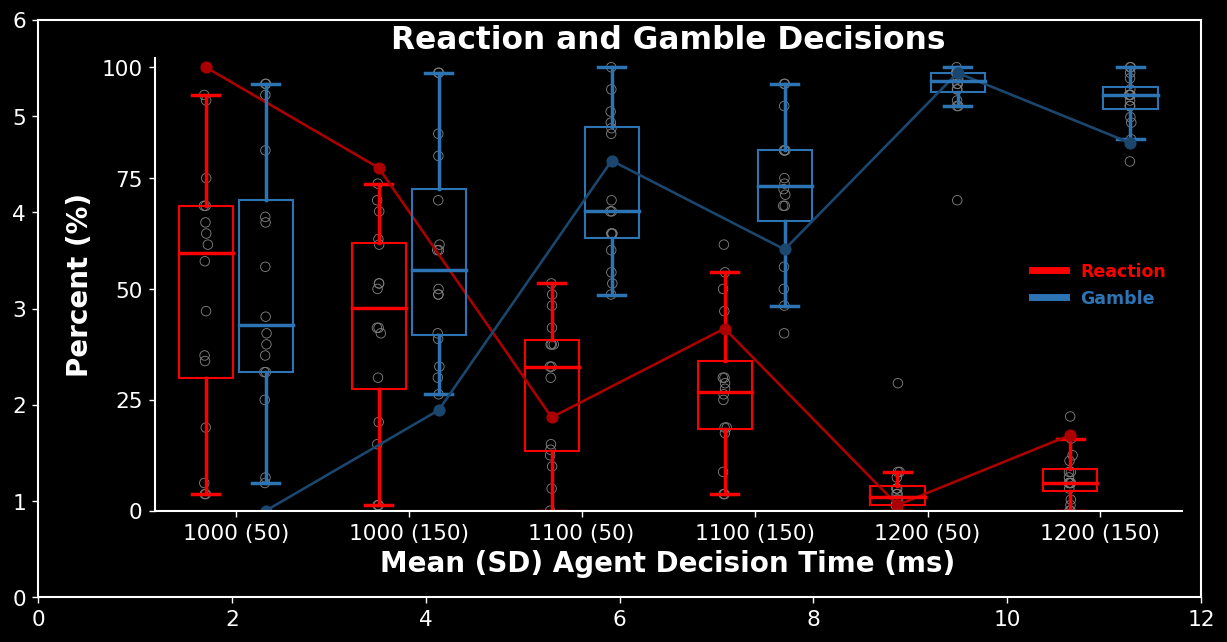

In [ ]:
optimal_metric1 = group_model.prob_selecting_reaction_optimal*100
optimal_metric2 = group_model.prob_selecting_gamble_optimal*100
data_metric1 = group.combine_all_subjects('perc_reactions')
data_metric2 = group.combine_all_subjects('perc_gambles')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)

plt.show()

Reaction and Gamble Leave Times

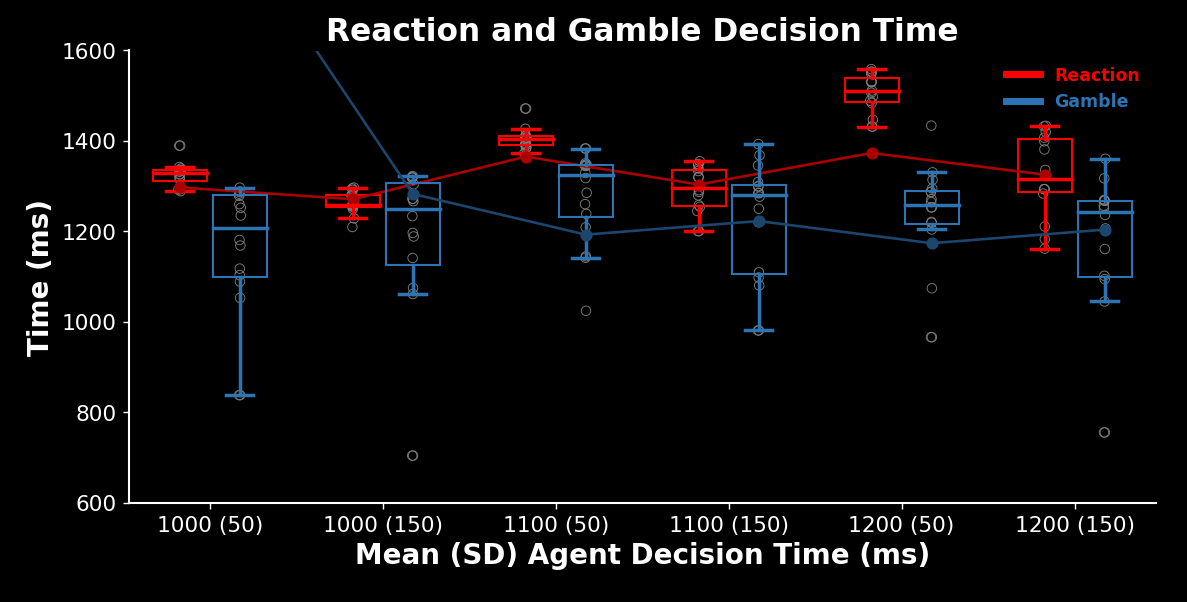

In [ ]:
optimal_metric1 = group_model.optimal_reaction_leave_target_time
optimal_metric2 = group_model.optimal_gamble_leave_target_time
data_metric1 = group.combine_all_subjects('reaction_decision_time_mean')
data_metric2 = group.combine_all_subjects('gamble_decision_time_mean')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(600,1750,200)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decision Time')
axmain.set_axis_off()

labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)

plt.show()

 # Find Wins, Indecisions, Incorrects Based on Optimal Decision Time

## Optimal Decision Time

$\tau^* = argmax_{\tau}(ER)$

## Reach Time Based On Optimal Gamble/Reaction

### Reach Times

1. Target Reach Time on Gamble = $TRT_{G} = DT^* + \mu_{MT}$

2. Target Reach Time on Reaction = $TRT_{R} = DT^* + \mu_{MT} + \mu_{RT}$

### Probability of Reacting and Gambling given Optimal Decision Time

1. $\mu_{diff} = DT^* - \mu_{ADT}$

2. $\sigma_{diff}^2 = \sigma_{P}^2 + \sigma_{ADT}^2$

3. Probability of Reacting = $P(R|DT^*) = P(\mu_{diff}>0|\sigma_{diff})$

4. Probability of Gambling = $P(G|DT*) = 1 - P(Reacting)$

Note: This feels BAYESIAN.. before I had the probability of wins, indecisions, incorrects given I react
- Now I have the probabilty of Reacting given the decision time

### Probability of Indecision Given Optimal Decision Time

1. Probability Indecision on Gamble = $P(I|G) = P(TRT_{G}>1500|\sigma_{MT})$

1. Probability Indecision on Reaction = $P(I|R) = P(TRT_{R}>1500|\sigma_{RMT})$

3. Probability of Indecision = $P(I|DT^*) = P(R|DT^*)*P(I|R) + P(G|DT^*)*P(I|G)$

### Probability of Win Given Optimal Decision Time

1. Probability Win on Gamble = $P(W|G) = P(TRT_{G}<1500|\sigma_{MT})*0.5$

1. Probability Win on Reaction = $P(W|R) = P(TRT_{R}<1500|\sigma_{RMT})*1.0$

3. Probability of Win = $P(W|DT^*) = P(R|DT^*)*P(W|R) + P(G|DT^*)*P(W|G)$

### Probability of Incorrect Given Optimal Decision Time

1. Probability Incorrect on Gamble = $P(L|G) = P(TRT_{G}<1500|\sigma_{MT})*0.5$

1. Probability Incorrect on Reaction = $P(L|R) = P(TRT_{R}<1500|\sigma_{RMT})*1.0$

3. Probability of Incorrect = $P(L|DT^*) = P(R|DT^*)*P(L|R) + P(G|DT^*)*P(L|G)$

In [ ]:
# Establish reach times
reach_time_gamble = optimal_decision_times + movement_time
reach_time_reaction = optimal_decision_times + reaction_time + movement_time

# Calculate difference of distributions
mean_diff = optimal_decision_times - agent_means
std_diff = np.sqrt(reaction_movement_uncertainty**2 + agent_stds**2) 
prob_react = 1 - stats.norm.cdf(0, mean_diff,std_diff) # Probability that optimal decision time is after the agent goes (aka we react)  NEEDED TO DO THE TWO DISTRIBUTION DIFFERENCE THING
prob_gamble = 1 - prob_react

prob_indecision_if_react = 1 - stats.norm.cdf(1500,reach_time_reaction,reaction_movement_uncertainty) # Probability that the reach time reaction is > 1500 
prob_indecision_if_gamble = 1 - stats.norm.cdf(1500,reach_time_gamble,movement_uncertainty)
prob_indecision = prob_react*prob_indecision_if_react + prob_gamble*prob_indecision_if_gamble


prob_win_if_react = (1-prob_indecision_if_react)*1.0 # prob win if react is the probability that I don't make a decision times the probability that i select the right target (1.0)
prob_win_if_gamble = (1-prob_indecision_if_gamble)*0.5 # prob win if gamble is the probability that I don't make a decision times the probabiliyt that I select the right target(0.5)


prob_incorrect_if_react = np.array([0]*len(agent_means))
prob_incorrect_if_gamble = (1-prob_indecision_if_gamble)*0.5

prob_win = prob_react*prob_win_if_react + prob_gamble*prob_win_if_gamble

prob_incorrect = prob_react*prob_incorrect_if_react + prob_gamble*prob_incorrect_if_gamble
print(f'Agent means = {agent_means}')
print(f'Agent Stds = {agent_stds}')
print(f'Prob indecision = {prob_indecision*100}')
print(f'Prob win =        {prob_win*100}')
print(f'Prob incorrect =  {prob_incorrect*100}')
print(prob_indecision + prob_win + prob_incorrect)

## Plot Data and Optimals

Decision Times

In [ ]:
# Calculate what the LEAVE TARGET TIME IS FOR THE OPTIMAL SIMULATION
# Because people's decision time on gambles is equal to the target leave time
# And people's decision time on reactions is equal to target leave time - reaction time
# SO in the optimal, I need to calculate the target leave time based on the probabiilty of gamble and react and what time they would leave if they did react or gamble
optimal_gamble_decision_times = optimal_decision_times
optimal_reaction_decision_times = optimal_decision_times + reaction_time
wtd_optimal_mean_left_target_time = (prob_gamble*optimal_gamble_decision_times + prob_react*optimal_reaction_decision_times)

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,150)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()
reaction_time_matrix = np.vstack([player_reaction_time_mean] * player_mean_decision_time.shape[1]).T
true_decision_time = player_mean_decision_time #- reaction_time_matrix
boxplot(true_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Time (ms)', title='Decision Times')
dv.jitter_array(ax,xlocs,true_decision_time.T,0.1, circle_size = 60, circle_lw = 1,lw = 1, circle_alpha = 0.7, include_mean = True)
ax.plot(xlocs, wtd_optimal_mean_left_target_time, marker = 'o',markersize = 8.5, c= wheel.orange)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(850,1600)
dv.Custom_Legend(ax, ['Participant Mean Decision Time','Optimal Mean Decision Time'], [wheel.grey,wheel.orange], fontsize = 12)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Indecisions

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()
boxplot(perc_player_indecisions, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Percent (%)', title='Indecisions')
dv.jitter_array(ax,xlocs,perc_player_indecisions.T,0.1, circle_size = 60, circle_lw = 1,lw = 1, circle_alpha = 0.7, include_mean = True)
ax.plot(xlocs, prob_indecision*100, marker = 'o',markersize = 8.5, c= wheel.orange)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
dv.Custom_Legend(ax, ['Participant Mean Indecisions','Optimal Indecisions'], [wheel.grey,wheel.orange], fontsize = 12)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Wins

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()
boxplot(perc_player_wins, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Percent (%)', title='Wins')
dv.jitter_array(ax,xlocs,perc_player_wins.T,0.1, circle_size = 60, circle_lw = 1,lw = 1, circle_alpha = 0.7, include_mean = True )
ax.plot(xlocs, prob_win*100, marker = 'o',markersize = 8.5, c= wheel.orange)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
dv.Custom_Legend(ax, ['Participant Mean Wins','Optimal Wins'], [wheel.grey,wheel.orange], fontsize = 12)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Incorrects

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()
boxplot(perc_player_incorrects, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Percent (%)', title='Incorrects')
dv.jitter_array(ax,xlocs,perc_player_incorrects.T,0.1, circle_size = 60, circle_lw = 1,lw = 1, circle_alpha = 0.7, include_mean = True )
ax.plot(xlocs, prob_incorrect*100, marker = 'o',markersize = 8.5, c= wheel.orange)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
dv.Custom_Legend(ax, ['Participant Mean Incorrects','Optimal Incorrects'], [wheel.grey,wheel.orange], fontsize = 12)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Gambles and Reaction Wins

In [ ]:
# Out of x number of reaction trials, this percentage was how many they won (same for gambles)
# So it's  percent = reaction_wins/total_reaction_trials
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_wins, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reaction_wins.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-0.15, prob_win_if_react*100, marker = 'o',markersize = 5.5, c= wheel.red, alpha = 0.75)

boxplot(perc_gamble_wins, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Wins (%)', title='Reaction and Gamble Wins')
ax.plot(xlocs+0.15, prob_win_if_gamble*100, marker = 'o',markersize = 5.5, c= wheel.light_blue, alpha = 0.75)

dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gamble_wins.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.set_ylim(0,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction and Gamble Indecisions

In [ ]:
# Percent = reaction indecisions / total Reaction trials
# !!!!!!!! WHEN THEY REACTED, HOW OFTEN DID THEY MAKE AN INDECISION
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_indecisions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reaction_indecisions.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-0.15, prob_indecision_if_react*100, marker = 'o',markersize = 5.5, c= wheel.red, alpha = 0.75)

boxplot(perc_gamble_indecisions, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Indecisions (%)', title='Reaction and Gamble Indecisions')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gamble_indecisions.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+0.15, prob_indecision_if_gamble*100, marker = 'o',markersize = 5.5, c= wheel.light_blue, alpha = 0.75)

ax.set_ylim(-4,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction Gamble Incorrects

In [ ]:
prob_incorrect_if_react

In [ ]:
# Percent = reaction incorrects / total Reaction trials
# !!!!!!!! WHEN THEY REACTED, HOW OFTEN DID THEY MAKE AN incorrects
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_incorrects, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reaction_incorrects.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-0.15, prob_incorrect_if_react*100, marker = 'o',markersize = 5.5, c= wheel.red, alpha = 0.75)

boxplot(perc_gamble_incorrects, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean (SD) Decision Time (ms)",
        ylab='Percentage (%)', title='Reaction and Gamble Incorrects')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gamble_incorrects.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+0.15, prob_incorrect_if_gamble*100, marker = 'o',markersize = 5.5, c= wheel.light_blue, alpha = 0.75)

ax.set_ylim(-4,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()